### Gaussian Mixture Model

- [Sklearn Official document URL - Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)

> class sklearn.mixture.GaussianMixture(n_components=1, *, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)

```python
from sklearn.mixture import GaussianMixture
```

##### Basic Setting

[reference] [GMM vs KMeans](https://romg2.github.io/mlguide/19_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C-07.-%EA%B5%B0%EC%A7%91%ED%99%94-GMM/)

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

mpl.rc('font', family='NanumGothic') # 폰트 설정
# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))
warnings.filterwarnings("ignore")

##### Visualization / Score

In [2]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    
    # 군집별 중심 위치: K-Means, Mean Shift 등
    if iscenter:
        centers = clusterobj.cluster_centers_
    
    # Cluster 값 종류
    unique_labels = np.unique(dataframe[label_name].values)
    
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        # 군집별 데이터 프레임
        label_cluster = dataframe[dataframe[label_name]==label]
        
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster '+str(label)
        
        # 각 군집 시각화
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        # 군집별 중심 위치 시각화
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
            
    if isNoise:
        legend_loc='upper center'
    else: 
        legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

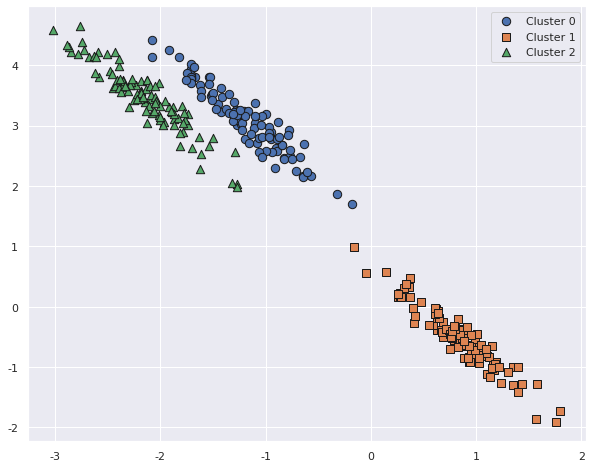

In [4]:
from sklearn.datasets import make_blobs

# 가상데이터
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 데이터 프레임
cluster_df = pd.DataFrame(X, columns=["ftr1","ftr2"])
cluster_df["target"] = y

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함. 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = X @ transformation

# 데이터 프레임
cluster_df = pd.DataFrame(X_aniso, columns=["ftr1","ftr2"])
cluster_df["target"] = y

# 가상데이터 시각화
visualize_cluster_plot(None, cluster_df, "target", iscenter=False)

#####  KMeans

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


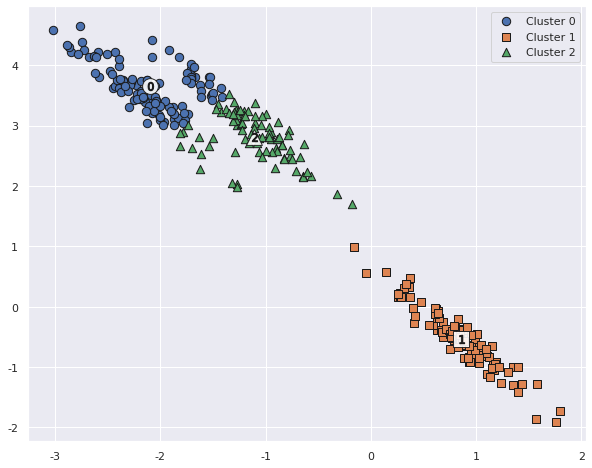

In [6]:
from sklearn.cluster import KMeans

# KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)

# 군집 레이블 추가
cluster_df["kmeans_label"] = kmeans_label

# 군집분석 시각화
visualize_cluster_plot(kmeans, cluster_df, "kmeans_label", iscenter=True)

##### Gaussian Mixture Model

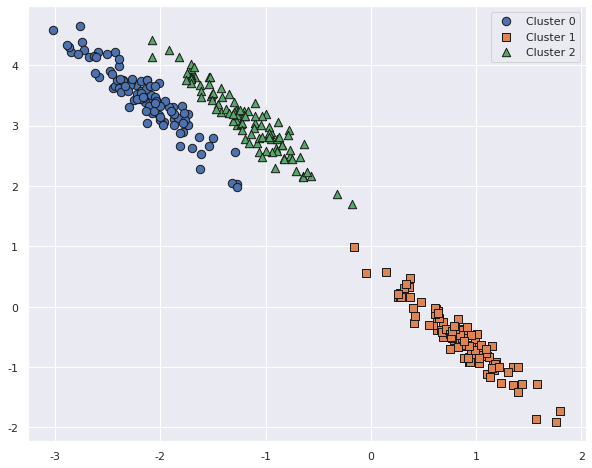

In [8]:
from sklearn.mixture import GaussianMixture

# GMM
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit_predict(X_aniso)

# 군집 레이블 추가
cluster_df["gmm_label"] = gmm_label

# GMM은 cluster_centers_ 속성이 없음
visualize_cluster_plot(gmm, cluster_df, 'gmm_label',iscenter=False)

In [9]:
print('### KMeans Clustering ###')
print(cluster_df.groupby('target')['kmeans_label'].value_counts())

print('\n### Gaussian Mixture Clustering ###')
print(cluster_df.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64
